#### **데이터 탐사분석**
데이터 탐사분석을 위해 기술 통계를 먼저 시행한다.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

### 데이터 불러오기

In [5]:
df = pd.read_csv('./data/spstat1.csv', sep=',', encoding='euc-kr',engine='python')
df

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1


---

##### 인덱싱 / 슬라이싱

In [8]:
df[247:]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1
251,72,2,5,2,250,1,4,2,3,3,...,2,1,0,3,2,8,3,6,1,1


In [11]:
df['구매장소']

0      1
1      3
2      1
3      3
4      5
      ..
247    5
248    5
249    1
250    1
251    2
Name: 구매장소, Length: 252, dtype: int64

In [12]:
df[['구매장소']]

,구매장소
0,1
1,3
2,1
3,3
4,5
...,...
247,5
248,5
249,1
250,1


In [15]:
df[df.columns[[1,4,5]]] # 1,4,5열 표시

,사용브랜드,구매가격,정보획득
0,1,15,1
1,1,20,4
2,1,25,1
3,1,26,4
4,1,30,6
...,...,...,...
247,2,200,6
248,2,200,6
249,2,200,2
250,2,200,2


In [19]:
df.loc[:,'학력':'결혼']

,학력,직업,월수입,결혼
0,2,4,2,2
1,4,4,4,2
2,4,7,4,2
3,2,2,5,3
4,4,9,2,1
...,...,...,...,...
247,7,8,2,1
248,6,4,6,2
249,6,4,3,2
250,2,1,2,1


In [20]:
df.iloc[1:7,2:5]    # 1행부터 6행까지, 2열부터 4열까지

,사용기간,구매장소,구매가격
1,3,3,20
2,2,1,25
3,5,3,26
4,3,5,30
5,1,4,30
6,5,2,40


In [22]:
df.at[5,'구매가격'] # 행번호, 열이름

30

In [23]:
df[df['구매가격']<50] # df에서 50 미만

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [24]:
(df['구매가격']>150) & (df['구매가격']<200) # 150 이상 200 미만 값. True로 출력

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Name: 구매가격, Length: 252, dtype: bool

In [27]:
df[(df['구매가격']>150) & (df['구매가격']<200)]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
233,206,2,3,4,160,6,1,5,3,1,...,3,3,1,2,1,5,8,1,1,3
234,140,2,3,4,170,6,3,5,1,2,...,1,2,1,3,2,4,2,5,1,4
235,128,2,5,4,180,6,4,3,4,5,...,5,3,1,6,3,1,9,3,3,2
236,25,2,3,5,180,6,5,3,3,3,...,4,4,1,4,2,6,4,5,1,4
237,149,2,2,3,182,6,2,5,2,3,...,3,4,1,3,2,4,4,6,2,2
238,244,2,4,1,190,5,5,2,3,5,...,4,2,0,5,3,4,4,2,2,4
239,90,2,3,2,190,6,2,2,2,4,...,4,5,0,4,2,4,4,5,1,4


In [28]:
df_columns = df.copy()  # 데이터 프레임 행 복사

In [32]:
df_columns.columns  # 행 확인

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [35]:
df_columns.rename(columns={'월수입':'경제수준'},inplace=True) # 변수 이름 변경. 위의 출력값 맨 아래줄에 '월수입'을 '경제수준'으로
df_columns.columns  # 행 확인

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '경제수준',
       '결혼', '가족수'],
      dtype='object')

In [37]:
df_columns['실사용기간'] = df_columns['사용기간'] * 1.5 # 변수값 곱하기 가능
df_columns['실사용기간']

0      4.5
1      4.5
2      3.0
3      7.5
4      4.5
      ... 
247    3.0
248    4.5
249    7.5
250    4.5
251    7.5
Name: 실사용기간, Length: 252, dtype: float64

In [40]:
df_columns.insert(6,'실제기간',df_columns['사용기간'] * 12) # 6번째 새롭게 계산한 변수 추가

In [41]:
del df_columns['실제기간']  # 변수 삭제

---

##### 데이터 탐사/통계분석 방법 결정

- 결측치/이상치 색출
- 정규분포성이 충족되었는지 점검 등
- 빈도, 최대값, 최소값, 평균, 표준편차 등 계산

In [43]:
df['구매가격'].describe()   # 구매가격 변인에 대한 기술 통계

count    252.000000
mean     101.226190
std       38.654982
min       10.000000
25%       80.000000
50%      100.000000
75%      120.000000
max      250.000000
Name: 구매가격, dtype: float64

**왜도**
- 함수 `skew()`
- 확률 이론 및 통계학에서, 비대칭도 또는 왜도는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다.

In [44]:
df['구매가격'].skew()

0.8074518614845148

**첨도**
- 함수 `kurtosis()`
- 확률분포의 꼬리가 두꺼운 정도를 나타내는 척도이다. 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타낸다. 첨도값이 3에 가까우면 산포도가 정규분포에 가깝다

In [45]:
df['구매가격'].kurtosis()

1.3613500036652209

In [47]:
df['사용브랜드'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
247    2
248    2
249    2
250    2
251    2
Name: 사용브랜드, Length: 252, dtype: int64>

In [48]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

위 두 코드의 차이점: 위에는 각각의 값들을 전부 counts, 아래는 함수로 () 묶었으니 1이 몇개, 2가 몇개인 식으로 출력

In [49]:
from matplotlib import font_manager, rc, rcParams   # 그래프에 필요한 한글 폰트 깔기
rc('font',family='Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

<AxesSubplot:>

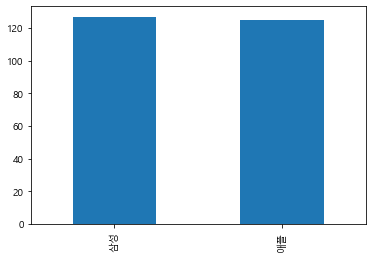

In [51]:
%matplotlib inline
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts().plot(kind='bar') # 1,2 값을 각각 삼성과 애플로 변경.

In [52]:
df['성별'].value_counts()

0    126
1    126
Name: 성별, dtype: int64

<AxesSubplot:ylabel='성별'>

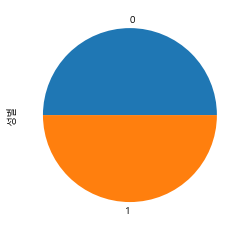

In [53]:
%matplotlib inline
df['성별'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='구매장소'>

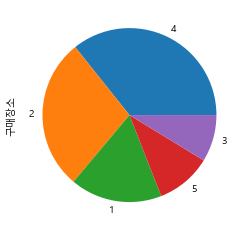

In [54]:
%matplotlib inline
df['구매장소'].value_counts().plot(kind='pie')

In [57]:
df1 = df.to_excel('./df.xlsx',index=False)

데이터 탐사 분석을 위한 기술통계를 시행했으면 변인들의 관계를 규명하기 위해, 분석 대상이 되는 변인들의 성격에 맞게 통계기법을 적용하여 분석한다. 다음 파일에..